In [44]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("housing.csv", sep=r'\s+', header=None)

# Add column names manually
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

X = df.drop("MEDV", axis=1)  
Y = df["MEDV"]               


X = np.array(X)
Y = np.array(Y)




## Linear Regression 

In [89]:
def gradient_descent(x, y, epochs, lr):
    previous_cost = float("inf")
    x_scaled = (x - x.mean(axis=0)) / x.std(axis=0)
    
    n = len(y)
    w_scaled = np.zeros(x_scaled.shape[1])
    b_scaled = 0
    for i in range(epochs):
        prediction = predict(w_scaled, x_scaled, b_scaled)

        dw = - (1/n) * x_scaled.T.dot(y - prediction)
        db = -( np.mean(y - prediction))
        w_scaled = w_scaled - lr * dw
        b_scaled = b_scaled - lr * db
        current_error = cost_error(w_scaled,b_scaled,x_scaled,y)
        if previous_cost != float("inf"):
            if abs(previous_cost - current_error) / previous_cost < 1e-6:
                print("Early stopping at " , i)
                break
        
        previous_cost = current_error
    
    w_original = w_scaled / x.std(axis=0)
    b_original = b_scaled - np.sum(w_original * x.mean(axis=0))

        # Clean up near-zero values
    w_original = np.where(np.isclose(w_original, 0), 0, w_original)
    if np.isclose(b_original, 0):
        b_original = 0

    final_cost = cost_error(w_original, b_original, X, Y)
    if np.isclose(final_cost, 0):
        final_cost = 0

    
    return w_original, b_original, final_cost
    
def cost_error(w, b, x, y):
    prediction = predict(w,x, b)
    return np.mean((y - prediction) ** 2)

def predict(w,x,b):
    return x.dot(w) + b

In [183]:
w, b, error = gradient_descent(X, Y, 5000, 0.001)
prediction = predict(w, X, b)

prediction

array([30.52555338, 24.88829896, 30.83970167, 29.27959883, 28.76299762,
       25.56235967, 23.00385589, 19.91269635, 12.01133424, 19.44765576,
       19.75472517, 21.8196414 , 21.0804795 , 20.1053237 , 19.75665172,
       19.72050038, 21.11780339, 17.42750733, 16.2429644 , 18.47804339,
       12.72001436, 17.98443381, 16.44573766, 14.24029511, 16.20610231,
       13.74155133, 15.99617382, 15.37848023, 20.33333547, 21.69872479,
       12.01925911, 18.42444639,  9.65363837, 14.46015992, 14.16441647,
       22.94784872, 21.5261087 , 22.57286401, 22.54419044, 30.01397287,
       33.09939489, 28.30457518, 25.10319663, 24.61019851, 22.72176267,
       21.41165599, 19.97193506, 17.87646192,  9.03874198, 16.98050129,
       20.96860908, 23.48701177, 27.527212  , 23.70495142, 16.69808087,
       30.6632299 , 25.50072232, 31.86345208, 21.8064507 , 20.5615032 ,
       17.3993854 , 17.88185674, 23.71872572, 23.09205244, 24.91760389,
       29.3592707 , 24.33798308, 21.55789129, 17.78733864, 21.19

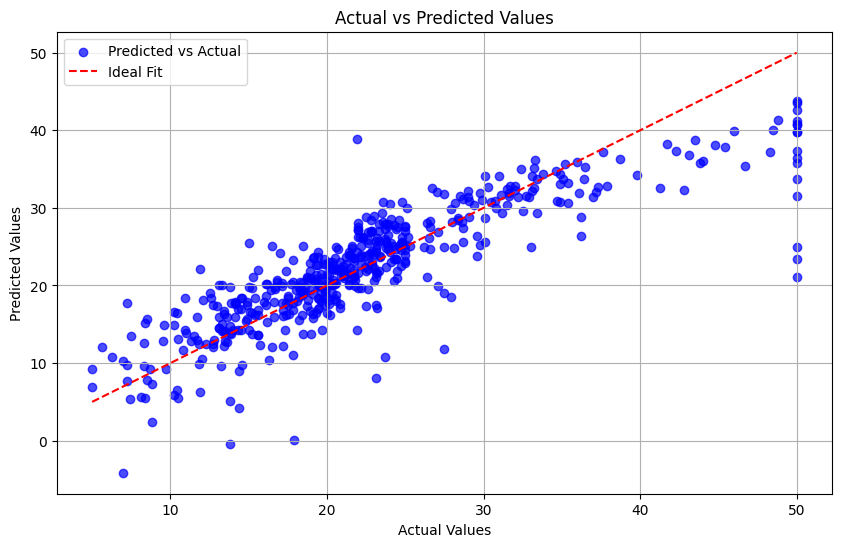

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y, prediction, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

np.float64(36.459488385089955)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
sklearn_predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, sklearn_predictions, alpha=0.7, color='green', label='Predicted vs Actual (sklearn)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (sklearn)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'X' is not defined

## Logistic Regression

In [16]:
df = pd.read_csv("email_spam_dataset.csv")
X = df.drop(columns='spam')
Y = df['spam']
X.shape


(2000, 12)

In [97]:
def gradient_descent_lr(x,y, epochs, lr):
    x = np.array(x)
    previous_cost = float("inf")
    y = np.array(y)
    x_scaled = (x- x.mean(axis=0)) / x.std(axis=0)
    w_scaled = np.zeros(x_scaled.shape[1])
    b_scaled = 0
    
    for i in range(epochs):
        n = len(y)
        prediction = predict(w_scaled, x_scaled, b_scaled)
        dw = (1/n) * x_scaled.T.dot(prediction - y)
        db = np.mean(prediction - y)
        w_scaled = w_scaled - lr * dw
        b_scaled = b_scaled - lr * db

        current_cost = cost_error(w_scaled, b_scaled, x_scaled, y)
        if previous_cost != float("inf"):
            if abs(current_cost - previous_cost) / previous_cost < 1e-5:
                print("Early stopping at " , i)
                break
            
        previous_cost = current_cost
    
    w_orig = w_scaled / x.std(axis=0)
    b_orig = b_scaled - np.sum(w_orig * x.mean(axis=0))
    final_cost = cost_error(w_orig,b_orig,  x, y)
    
    return w_orig, b_orig, final_cost
    
    

def cost_error(w, b,x , y):
    prediction = predict(w, x, b)
    return  - (np.mean(y * np.log(prediction) + (1-y) * np.log(1 - prediction)))

def predict(w, x, b):
    z = b + np.dot(x, w)
    return (1 / (1+ np.exp(-z)))

def classify(prediction, threshold=0.5):
    return (prediction >= threshold).astype(int)
    


In [140]:
w, b, cost = gradient_descent_lr(X, Y, 1000, 0.1)
prediction = predict(w, X[:500], b)

d = classify(prediction, 0.3)
y = np.array(Y)
cost

np.float64(0.10198061301934773)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np
import pandas as pd

# Ensure X and Y are numpy arrays
X = np.array(X)
Y = np.array(Y)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train sklearn Logistic Regression model
sklearn_model = LogisticRegression(max_iter=1000)
sklearn_model.fit(X_train, Y_train)

# Extract weights and bias from sklearn model
sklearn_weights = sklearn_model.coef_.flatten()
sklearn_bias = sklearn_model.intercept_[0]

# Make predictions and calculate log loss
sklearn_predictions = sklearn_model.predict_proba(X_test)[:, 1]
sklearn_cost = log_loss(Y_test, sklearn_predictions)

# Compare results
print("Custom Logistic Regression:")
print(f"Weights: {w}")
print(f"Bias: {b}")
print(f"Cost: {cost}")

print("\nSklearn Logistic Regression:")
print(f"Weights: {sklearn_weights}")
print(f"Bias: {sklearn_bias}")
print(f"Cost: {sklearn_cost}")

Custom Logistic Regression:
Weights: [ 2.64127812e-01  1.52640427e-01 -5.58029171e-02  4.41675487e-03
  4.66645210e-05 -2.77630100e-02 -5.05268058e-03  6.24720866e-01
  8.29732742e-01  2.00550144e+00  3.48880862e+00 -3.21200181e+00]
Bias: -3.079588708943634
Cost: 0.10198061301934773

Sklearn Logistic Regression:
Weights: [ 3.93114616e-01  1.37629406e-01 -1.47613045e-01  1.27490652e-02
  6.00239404e-05 -2.79292446e-02 -1.27476088e-02  6.40506309e-01
  1.15527943e+00  2.35391914e+00  6.93149099e-01 -3.17973176e+00]
Bias: -3.972693077449384
Cost: 0.10912788124225052


Custom Logistic Regression Metrics:
Accuracy: 0.97
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[388   1]
 [ 11   0]]

Sklearn Logistic Regression Metrics:
Accuracy: 0.9675
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[387   2]
 [ 11   0]]


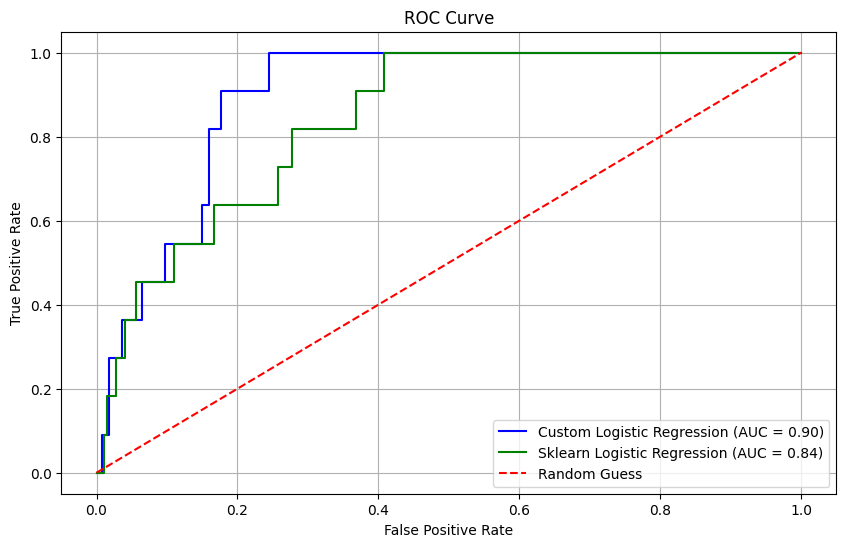

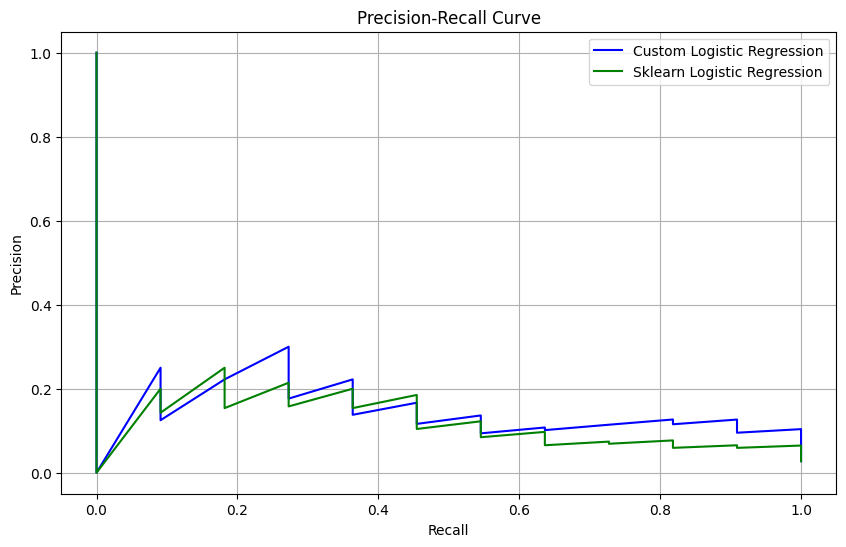

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

custom_predictions = classify(predict(w, X_test, b))
custom_accuracy = accuracy_score(Y_test, custom_predictions)
custom_precision = precision_score(Y_test, custom_predictions)
custom_recall = recall_score(Y_test, custom_predictions)
custom_f1 = f1_score(Y_test, custom_predictions)
custom_conf_matrix = confusion_matrix(Y_test, custom_predictions)

sklearn_binary_predictions = (sklearn_predictions >= 0.5).astype(int)
sklearn_accuracy = accuracy_score(Y_test, sklearn_binary_predictions)
sklearn_precision = precision_score(Y_test, sklearn_binary_predictions)
sklearn_recall = recall_score(Y_test, sklearn_binary_predictions)
sklearn_f1 = f1_score(Y_test, sklearn_binary_predictions)
sklearn_conf_matrix = confusion_matrix(Y_test, sklearn_binary_predictions)

print("Custom Logistic Regression Metrics:")
print(f"Accuracy: {custom_accuracy}")
print(f"Precision: {custom_precision}")
print(f"Recall: {custom_recall}")
print(f"F1 Score: {custom_f1}")
print(f"Confusion Matrix:\n{custom_conf_matrix}")

print("\nSklearn Logistic Regression Metrics:")
print(f"Accuracy: {sklearn_accuracy}")
print(f"Precision: {sklearn_precision}")
print(f"Recall: {sklearn_recall}")
print(f"F1 Score: {sklearn_f1}")
print(f"Confusion Matrix:\n{sklearn_conf_matrix}")

custom_fpr, custom_tpr, _ = roc_curve(Y_test, predict(w, X_test, b))
custom_auc = auc(custom_fpr, custom_tpr)
sklearn_fpr, sklearn_tpr, _ = roc_curve(Y_test, sklearn_predictions)
sklearn_auc = auc(sklearn_fpr, sklearn_tpr)

plt.figure(figsize=(10, 6))
plt.plot(custom_fpr, custom_tpr, label=f"Custom Logistic Regression (AUC = {custom_auc:.2f})", color='blue')
plt.plot(sklearn_fpr, sklearn_tpr, label=f"Sklearn Logistic Regression (AUC = {sklearn_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

custom_precision_vals, custom_recall_vals, _ = precision_recall_curve(Y_test, predict(w, X_test, b))
sklearn_precision_vals, sklearn_recall_vals, _ = precision_recall_curve(Y_test, sklearn_predictions)

plt.figure(figsize=(10, 6))
plt.plot(custom_recall_vals, custom_precision_vals, label="Custom Logistic Regression", color='blue')
plt.plot(sklearn_recall_vals, sklearn_precision_vals, label="Sklearn Logistic Regression", color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree 

In [36]:


def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts/counts.sum()
    return (1 - np.sum(probs ** 2))


def information_gain(parent, left, right):
    n = len(parent)
    left_n = len(left)
    right_n = len(right)
    
    weighted_gini = (left_n / n) * gini_impurity(left) + (right_n/ n) * gini_impurity(right) 
    return gini_impurity(parent) - weighted_gini


def best_split(x, y):
    best_feature, best_value = None, None
    best_gain = 0
    n_features = x.shape[1]
    
    for feature in range(n_features):
        values = np.unique(x[:, feature])
        
        for value in values:
            left_idx = x[:, feature] <= value
            right_idx = x[:, feature] > value
            
            if left_idx.sum() == 0 or right_idx.sum() == 0:
                continue
        
            left, right = y[left_idx], y[right_idx]
            gain = information_gain(y, left, right)
            
            if gain > best_gain:
                best_gain = gain
                best_value = value
                best_feature = feature
                
    return best_feature, best_value, best_gain


class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        

def build_tree(x, y, depth=0, max_depth=3):
    if len(np.unique(y)) == 0:
        return Node(value=y[0])
    
    if depth >= max_depth:
        values, counts = np.unique(y, return_counts=True)
        majority_class = values[np.argmax(counts)]
        return Node(value=majority_class)
    
    feature, threshold, gain = best_split(x, y)
    
    if gain == 0:
        values, counts = np.unique(y, return_counts=True)
        majority_class = values[np.argmax(counts)]
        return Node(value=majority_class)        
    

    left_idx = x[:, feature] <= threshold
    right_idx = x[:, feature] > threshold
    
    left_x, right_x = x[left_idx], x[right_idx]
    left_y, right_y = y[left_idx], y[right_idx]
    
    left_node = build_tree(left_x, left_y, depth +1, max_depth)
    right_node = build_tree(right_x, right_y, depth +1 , max_depth)
    
    return Node(feature, threshold, left_node, right_node)
    


In [37]:
def predict_one(x, tree):
    if tree.value is not None:
        return tree.value
    
    if x[tree.feature] <= tree.threshold:
        return predict_one(x, tree.left)
    else:
        return predict_one(x, tree.right)

def predict(X, tree):
    return np.array([predict_one(x, tree) for x in X])


In [42]:
X = np.array([[1],[2],[3],[4],[5],[6]])
y = np.array([0,0,0,1,1,1])

tree = build_tree(X, y, max_depth=3)
X_test = np.array([[2],[5],[3]])
print(predict(X_test, tree))


[0 1 0]


## Practice 

In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv("housing.csv")
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype(int)
df['Fare'] = df['Fare'].fillna(df['Fare'].mean()).astype(int)
df = df.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], errors='ignore')
X = df.drop(columns=["Survived"])
Y = df["Survived"]
X["Sex"] = X["Sex"].map({"male": 0, "female": 1})
X["Embarked"] = X["Embarked"].map({"C": 0, "Q": 1, "S": 2})
X.dropna()
df.isnull().values.any()





X = np.array(X)
Y = np.array(Y)
from sklearn.model_selection import train_test_split

# X and Y are already numpy arrays
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, Y_train.shape)
print("Test size:", X_test.shape, Y_test.shape)


Train size: (334, 7) (334,)
Test size: (84, 7) (84,)


In [43]:
from LinearModels import LogisticRegression

model = LogisticRegression()

w, b, cost = model.best_fit(X_train, Y_train, '', 5000, 0.01)
print("W and b : ", w, b)
print("Cost: ", cost)

W and b :  [-7.79107920e-02  7.64634283e+00 -1.32524907e-03  5.42429444e-02
  6.67514974e-02  2.32576682e-03 -6.29362446e-02] -3.668062921105581
Cost:  0.0210181944778285


In [44]:
classification = model.classify(w, X_test, b)

# Debugging: Evaluate model metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(Y_test, classification)
precision = precision_score(Y_test, classification, zero_division=1)
recall = recall_score(Y_test, classification, zero_division=1)
f1 = f1_score(Y_test, classification, zero_division=1)
conf_matrix = confusion_matrix(Y_test, classification)

# Print metrics
print("Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

classification

Model Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [33]:
Y_test[:50]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0])

## Titanic survival

In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv("housing.csv")
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype(int)
df['Fare'] = df['Fare'].fillna(df['Fare'].mean()).astype(int)
df = df.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], errors='ignore')
X = df.drop(columns=["Survived"])
Y = df["Survived"]
X["Sex"] = X["Sex"].map({"male": 0, "female": 1})
X["Embarked"] = X["Embarked"].map({"C": 0, "Q": 1, "S": 2})
X.dropna()
df.isnull().values.any()





X = np.array(X)
Y = np.array(Y)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, Y_train.shape)
print("Test size:", X_test.shape, Y_test.shape)


Train size: (334, 7) (334,)
Test size: (84, 7) (84,)


In [46]:
from LinearModels import LogisticRegression

model = LogisticRegression()

w, b, cost = model.best_fit(X_train, Y_train, '', 5000, 0.01)
print("W and b : ", w, b)
print("Cost: ", cost)

W and b :  [-7.79107920e-02  7.64634283e+00 -1.32524907e-03  5.42429444e-02
  6.67514974e-02  2.32576682e-03 -6.29362446e-02] -3.668062921105581
Cost:  0.0210181944778285


In [47]:
classification = model.classify(w, X_test, b)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(Y_test, classification)
precision = precision_score(Y_test, classification, zero_division=1)
recall = recall_score(Y_test, classification, zero_division=1)
f1 = f1_score(Y_test, classification, zero_division=1)
conf_matrix = confusion_matrix(Y_test, classification)
print("Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

classification

Model Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [48]:
Y_test[:50]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0])